In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
env = gym.make('MountainCar-v0')
env.reset()

array([-0.43211565,  0.        ])

In [3]:
print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

[0.6  0.07]
[-1.2  -0.07]
3


In [4]:
Discrete_os_size = [100] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/Discrete_os_size

learning_rate = 0.1
discount = 0.95
episodes = 1000000

print(discrete_os_win_size)
print(Discrete_os_size)

[0.018  0.0014]
[100, 100]


In [5]:
def get_discreet(state):
    discreet_state = (state - env.observation_space.low)/ discrete_os_win_size
    return tuple(discreet_state.astype(np.int))



In [6]:
q_table = np.random.uniform(low=-2,high=0, size = (Discrete_os_size + [env.action_space.n]))
'''with open('discrete-100_1e6-runs+1585257106.pickle', 'rb') as file:
    q_table = pickle.load(file)'''
print(q_table.shape)

(100, 100, 3)


In [7]:
env.reset()
done = False
while not done:
    action = 2
    new_state, reward, done, _ = env.step(action)
    #plt.imshow(env.render(mode = 'rgb_array'))
    env.render()
    print (reward, 
            get_discreet(new_state))
env.close()

-1.0 (43, 50)
-1.0 (43, 50)
-1.0 (43, 50)
-1.0 (43, 50)
-1.0 (44, 50)
-1.0 (44, 50)
-1.0 (44, 50)
-1.0 (44, 50)
-1.0 (44, 50)
-1.0 (44, 51)
-1.0 (44, 51)
-1.0 (44, 51)
-1.0 (44, 51)
-1.0 (44, 51)
-1.0 (44, 51)
-1.0 (44, 51)
-1.0 (45, 51)
-1.0 (45, 51)
-1.0 (45, 51)
-1.0 (45, 51)
-1.0 (45, 51)
-1.0 (45, 51)
-1.0 (45, 51)
-1.0 (45, 51)
-1.0 (45, 51)
-1.0 (45, 51)
-1.0 (46, 51)
-1.0 (46, 51)
-1.0 (46, 50)
-1.0 (46, 50)
-1.0 (46, 50)
-1.0 (46, 50)
-1.0 (46, 50)
-1.0 (46, 50)
-1.0 (46, 50)
-1.0 (46, 50)
-1.0 (46, 50)
-1.0 (46, 49)
-1.0 (46, 49)
-1.0 (46, 49)
-1.0 (46, 49)
-1.0 (46, 49)
-1.0 (46, 49)
-1.0 (46, 49)
-1.0 (46, 49)
-1.0 (46, 49)
-1.0 (46, 49)
-1.0 (46, 48)
-1.0 (45, 48)
-1.0 (45, 48)
-1.0 (45, 48)
-1.0 (45, 48)
-1.0 (45, 48)
-1.0 (45, 48)
-1.0 (45, 48)
-1.0 (45, 48)
-1.0 (45, 48)
-1.0 (45, 48)
-1.0 (44, 48)
-1.0 (44, 48)
-1.0 (44, 48)
-1.0 (44, 48)
-1.0 (44, 48)
-1.0 (44, 48)
-1.0 (44, 48)
-1.0 (44, 48)
-1.0 (44, 49)
-1.0 (44, 49)
-1.0 (44, 49)
-1.0 (43, 49)
-1.0 (43, 49)
-1.0 (

In [8]:
epsilon = 0.5
end_explore = episodes//2
e_decay = epsilon/end_explore

reward_list = []
time_list = []

In [9]:
for e in range(episodes):
    #env.reset()
    done = False
    ds = get_discreet(env.reset())
    
    r, t = 0, 0
    

    while not done:
        if np.random.random()> epsilon:
            action = np.argmax(q_table[ds])
        else:
            action = np.random.randint(0, env.action_space.n)
        new_state, reward, done, _ = env.step(action)
        new_ds = get_discreet(new_state)
                
        if not done:
            max_future_q = np.max(q_table[new_ds])
            current_q = q_table[ds + (action, )]
            new_q = current_q + learning_rate*(reward + discount*max_future_q - current_q)

            q_table[ds + (action, )] = new_q
            

        elif new_state[0] >= env.goal_position:
            q_table[ds + (action, )] = 0
        
        ds = new_ds
        epsilon -= e_decay
        
        r+= reward
        t+=1
        
    if e%(episodes//10)==0:
        print(e, )
    reward_list.append(r)
    time_list.append(t)
    
env.close()

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


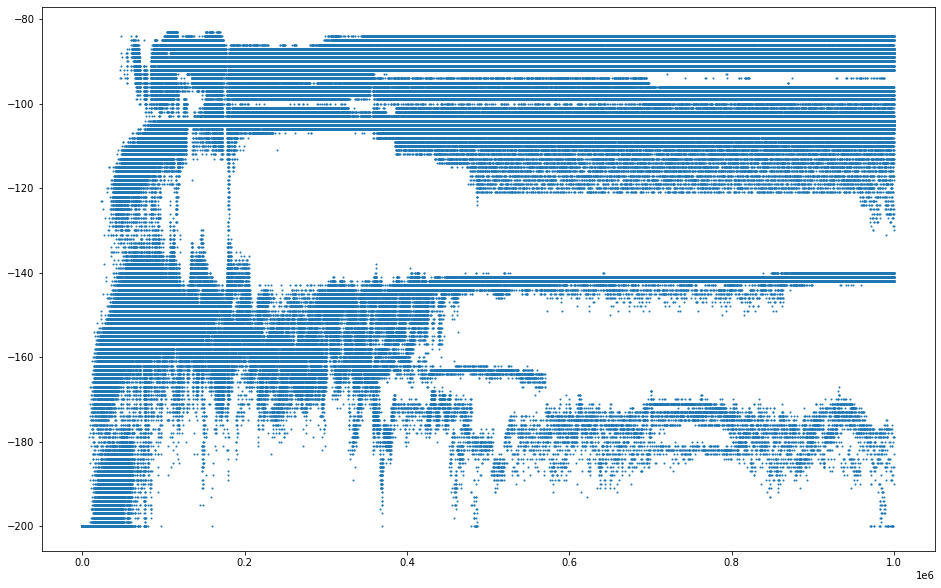

In [11]:
plt.figure(figsize = (16, 10))
plt.scatter(range(len(reward_list)), reward_list,
           #figsize = (16, 10), 
            s = 1,
            #edgecolor = 'black',

           )
plt.show()

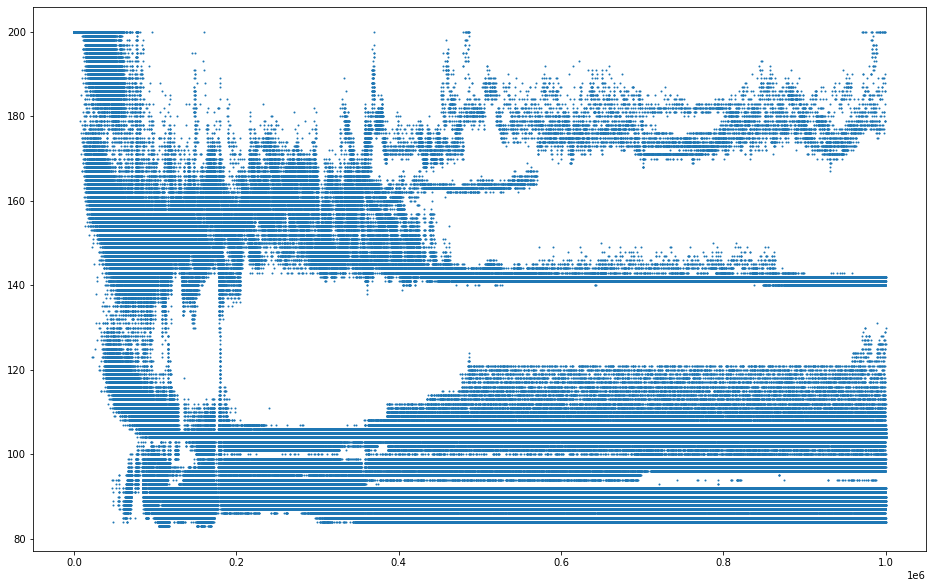

In [12]:
plt.figure(figsize = (16, 10))
plt.scatter(range(len(time_list)), time_list,
           #figsize = (16, 10), 
            s = 1,
            #edgecolor = 'black',

           )
plt.show()

In [18]:
env.reset()
done = False
ds = get_discreet(env.reset())
while not done:
    action = np.argmax(q_table[ds])
    new_state, reward, done, _ = env.step(action)
    ds = get_discreet(new_state)

    env.render()
env.close()

In [ ]:
import pickle
import time

with open(f'discrete-100_1e6-runs+{str(int(time.time()))}.pickle', 'wb') as file:
    pickle.dump(q_table, file)